<a href="https://colab.research.google.com/github/JaySavani/ML_Lab/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    4.1 Steps for Data Transformation 


In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 2: Load Data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_for_Transformation.csv')

# Step 3: Seperate Input and Output attributes

# All rows, all columns except last
X = data.iloc[:, :-1].values

# Only last column
Y = data.iloc[:, -1].values

print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)

X_new = data.iloc[:,1:3].values
print("\n\nX for transformation : \n", X_new)

# Step 4 : Perform scaling on age and salary

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)

print("\n\nScaled X : \n", X_scaled)

# Step 5 : Perform standardization on age and salary

std = StandardScaler()
X_std = std.fit_transform(X_new)

print("\n\nStandardized X : \n", X_std)



Input : 
 [['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]


Output: 
 ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


X for transformation : 
 [[   44 72000]
 [   27 48000]
 [   30 54000]
 [   38 61000]
 [   40 68000]
 [   35 58000]
 [   39 52000]
 [   48 79000]
 [   50 83000]
 [   37 67000]
 [   45 55000]]


Scaled X : 
 [[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.56521739 0.57142857]
 [0.34782609 0.28571429]
 [0.52173913 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]
 [0.7826087  0.2       ]]


Standardized X : 
 [[ 0.68188156  0.79548755]
 [-1.81835082 -1.41513049]
 [-1.37713334 -0.86247598]
 [-0.2005534  -0.21771238]
 [ 0.09359159  0.42705121]
 [-0.64177088 -0.49403964]
 [-0.05348091 -1

     4.2 Steps for Handling Categorical Data

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Step 2: Load Data
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_for_Categorical_Values.csv')

# print("\nData :\n",data1)
# print("\nData statistics\n",data1.describe())

# Step 3: Seprate Input and Output attributes

# All rows, all columns except last
X = data1.iloc[:, :-1].values

# Only last column
Y = data1.iloc[:, -1].values

print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)

# Step 4a: Apply LabelEncoder on the data to convert country names into numeric values

le = LabelEncoder()
X[ : ,0] = le.fit_transform(X[ : ,0])
print("\n\nInput : \n", X)

# Step 4b: Use dummy variables from pandas library to create one column for each country
# dummy = pd.get_dummies(data1['Country'])
# print("\n\nDummy :\n",dummy)

# data1 = data1.drop(['Country','Purchased'],axis=1)
# data1 = pd.concat([dummy,data1],axis=1)
# print("\n\nFinal Data :\n",data1)

# #Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()

#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object
x = onehotencoder.fit_transform(data1.Country.values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(data1.shape[1]-1)])
df = pd.concat([data1, dfOneHot], axis=1) #column

#droping the country column
df= df.drop(['Country'], axis=1)

#printing to verify
print(df.head())



Input : 
 [['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]


Output: 
 ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


Input : 
 [[0 44 72000]
 [2 27 48000]
 [1 30 54000]
 [2 38 61000]
 [1 40 68000]
 [0 35 58000]
 [2 39 52000]
 [0 48 79000]
 [1 50 83000]
 [0 37 67000]
 [2 45 55000]]
   Age  Salary Purchased  Country_0  Country_1  Country_2
0   44   72000        No        1.0        0.0        0.0
1   27   48000       Yes        0.0        0.0        1.0
2   30   54000        No        0.0        1.0        0.0
3   38   61000        No        0.0        0.0        1.0
4   40   68000       Yes        0.0        1.0        0.0


    4.3 Steps for Handling the missing value

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 2: Load Data
datasets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())

# Step 3: Seprate Input and Output attributes

# All rows, all columns except last
X = datasets.iloc[:, :-1].values

# Only last column
Y = datasets.iloc[:, -1].values

print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)

# Step 4: Find the missing values and handle it in either way

# 4a. Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)

#4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)

updated_df = datasets;
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()

updated_df = datasets;
updated_df['Salary']=updated_df['Salary'].fillna(updated_df['Salary'].mean())
updated_df.info()

datasets

new_X = datasets.iloc[:, :-1].values
# Only last column
new_Y = datasets.iloc[:, -1].values

# Using SimpleImputer from Scikit-Learn Library

# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 2: Load Data
datasets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())

# Step 3: Seprate Input and Output attributes

# All rows, all columns except last
X = datasets.iloc[:, :-1].values

# Only last column
Y = datasets.iloc[:, -1].values

print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)

# Step 4: Find the missing values and handle it in either way
# 4a. Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)

#4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)

# 4b. Imputation (Replacing null values with mean value of that attribute)

# All rows, all columns except last
new_X = datasets.iloc[:, :-1].values

# Only last column
new_Y = datasets.iloc[:, -1].values

updated_df['Age'].fillna(updated_df['Age'].mean())

# Using Imputer function to replace NaN values with mean of that parameter value
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")

# Fitting the data, function learns the stats
imputer = imputer.fit(new_X[:, 1:3])

# fit_transform() will execute those stats on the input ie. X[:, 1:3]
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3])

# filling the missing value with mean
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X)


Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


Input : 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 7

    4.4 Correlation

   X1  X2  X3  X4  Y
0   1   1   4  -2  1
1   2   4   5  -4  1
2   3   9   6   3  0
3   4  16   7   4  0
4   5  25   8  25  1
    X1   X2  X3   X4
0    1    1   4   -2
1    2    4   5   -4
2    3    9   6    3
3    4   16   7    4
4    5   25   8   25
5    6   36   9   76
6    7   49  10   34
7    8   64  11  346
8    9   81  12   67
9   10  100  13    3
10  11  121  14  355
11  12  144  15   88
12  13  169  16    2
13  14  196  17    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      14 non-null     int64
 1   X2      14 non-null     int64
 2   X3      14 non-null     int64
 3   X4      14 non-null     int64
dtypes: int64(4)
memory usage: 576.0 bytes
    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1


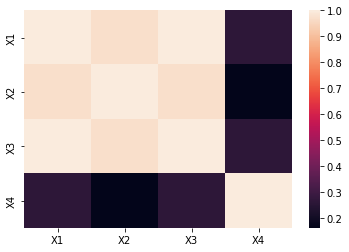

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_for_Correlation.csv')

print(data.head())

data = data.iloc[:,:-1]
print(data)

data.info()

corr = data.corr()
corr.head()

sns.heatmap(corr)

columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

selected_columns = data.columns[columns]
selected_columns.shape

data = data[selected_columns]
print(data)

    Perform all data preprocessing tasks and feature selection on "Exercise-CarData.csv" Hint: Check "na_values" attribute of pd.read()

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 2: Load Data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exercise-CarData.csv')
print(data)

data.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",data)

updated_df.info()

updated_df = data;
updated_df['Price']=updated_df['Price'].fillna(updated_df['Price'].mean())

updated_df = data;
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())

# updated_df = data;
# updated_df['KM']=updated_df['KM'].fillnan(updated_df['KM'].mean())
# updated_df.info()

# updated_df = data;
# updated_df['HP']=updated_df['HP'].fillna(updated_df['HP'].mean())
# updated_df.info()

updated_df = data;
updated_df['MetColor']=updated_df['MetColor'].fillna(updated_df['MetColor'].mean())

updated_df = data;
updated_df['Automatic']=updated_df['Automatic'].fillna(updated_df['Automatic'].mean())

updated_df = data;
updated_df['CC']=updated_df['CC'].fillna(updated_df['CC'].mean())
updated_df.info()

newdf = data.select_dtypes(include='string')
newdf


# # X_new = data.iloc[:,:4].values
# # print("\n\nX for transformation : \n", X_new)

# # scaler = MinMaxScaler()
# # X_scaled = scaler.fit_transform(X_new)

# # print("\n\nScaled X : \n", X_scaled)

      Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  Weight  
0    

""
0
1
2
3
4
...
1431
1432
1433
1434


In [ ]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/content/train.csv')

# Generate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  
